## Earth's Atmospheric Composition: Computer Laboratory #3

Paul Palmer, University of Edinburgh (paul.palmer@ed.ac.uk)

### Contents:

The learning objectives of this lab are:
1. Understand about the global distribution of atmospheric CO$_2$
2. Understand what determines the lifetime of a gas that is subject to different loss processes.
3. Understand the relevance of an e-folding lifetime is to atmospheric composition.

This is a [Jupyter](https://www.jupyter.org "Jupyter's Homepage") notebook, which allows you to use the power of Python without much knowledge of the language.

**To run the code below:**
1. Click on the cell to select it.
2. Press SHIFT+ENTER on your keyboard or press the play button () in the toolbar above.

### Exercise #4: Global 3-D model output

Below is some code to plot and analyze output from the global 3-D [GEOS-Chem model](http://acmg.seas.harvard.edu/geos/index.html "GEOS-Chem Homepage"). It is a state-of-the-science community model that has been used extensively to interpret aircraft, ground-based and space-borne observations of GHGs. It is an atmospheric transport model, which means it uses pre-computered analyzed meteorology taken from large-scale weather prediction models that include lots of data to ensure the physical parameters closely describe the observed weather patterns. GEOS-Chem describes the physical, chemical and biological processes associated with (in this example) atmospheric CO$_2$.


The code reads in output from a model simulation that has been run at a spatial resolution of 4 degrees (latitude) by 5 degrees (longitude), which is approximately 400 km by 500 km. The temporal resolution is weekly, which is sufficient to observe the seasonal cycle of atmospheric CO$_2$. 

#### Activitiy (Geographical and seasonal variations)
1. The two sliders refer to the time (weeks 1-52) and the vertical level (1 = near surface, 46 = top of the atmosphere). There are approximately 15 layers in the troposphere. Ignore values above level 15. 
   * Look at the lowest level and adjust time from January through to December. What do you notice in the Northern hemisphere and Southern hemisphere?
   * Look at January, July and December but move up through the atmosphere. What do you find? What implications does this have for observing atmospheric CO$_2$?

As well as the model tracking total atmospheric CO$_2$ we can also track the individual constituents. For example, we can track fossil fuel CO$_2$, biomass burning CO$_2$, terrestrial biosphere CO$_2$, and the ocean biosphere CO$_2$. 

#### Activity (CO$_2$ from individual sectors)
1. In the code add a line to read in 'fossil_co2', 'ocean_co2, 'bio_co2, or 'bb_co2' to see these constituent.

...

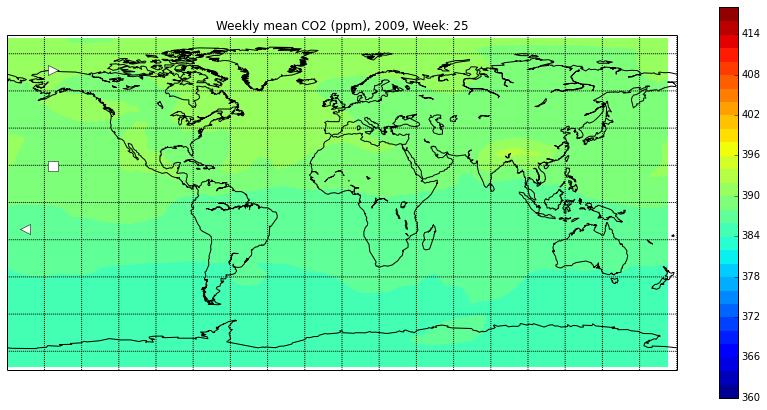

In [4]:
%matplotlib inline
from ipywidgets import widgets, interact, interactive
from IPython.display import clear_output, display, HTML
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import numpy as np
import pylab as plt

f =Dataset('datafiles/tagged_co2_2009_weekly.nc')
co2 = f.variables['total_co2']
bsco2 = f.variables['bio_co2']
lat = f.variables['latitude'][:]
lon = f.variables['longitude'][:]

# ppm
co2 = np.array(co2)/1e-6

print(np.max(co2))

lon2, lat2 = np.meshgrid(lon,lat)

def plotSAT(time,level):

    # Establish a map to plot atmospheric CO2.
    fig = plt.figure(figsize=(15,7))
    m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c')
    x, y = m(lon2, lat2)

    m.drawcoastlines()
    m.drawparallels(np.arange(-80.,81.,20.))
    m.drawmeridians(np.arange(0.,360.,20.))
    m.drawmapboundary(fill_color='white')    
    
    # Plot the data
    levels=np.arange(30)*2+360.
    m.contourf(x,y,co2[time,level,:,:],levels)
    plt.colorbar()
    plt.title('Weekly mean CO2 (ppm), 2009, Week: '+str(time))

    #Mauna Loa, Hawaii
    lonuse = -155.6 # degrees W
    latuse = 19.5   # degrees N
    xpt,ypt = m(lonuse, latuse)
    m.plot(xpt, ypt, 'ws', markersize=10)
    #Barrow, Alaska
    lonuse = -155.6 # degrees W
    latuse = 71.3   # degrees N
    xpt,ypt = m(lonuse, latuse)
    m.plot(xpt, ypt, 'w>', markersize=10)
    #America Samoa
    lonuse = -170.5 # degrees W
    latuse = -14.2  # degrees N
    xpt,ypt = m(lonuse, latuse)
    m.plot(xpt, ypt, 'w<', markersize=10)
    
    
interactive(plotSAT,time=(0,51),level=(0,46,1))

#### Activity (Timeseries)

I have superimposed three symbols on the 2-D map: the rightward arrow head, the square, and the leftward arrow head indicate the position of Barrow Alaska, Mauna Loa, and American Samoa, respectively. These represent three of the [NOAA observatories](http://www.esrl.noaa.gov/gmd/obop/) that are intentionally located far from local sources they can sample atmospheric GHGs representative of large spatial scales. 

Below is some code that extracts the full annual time series from a particular geographical location defined by the latitude and longitude. 

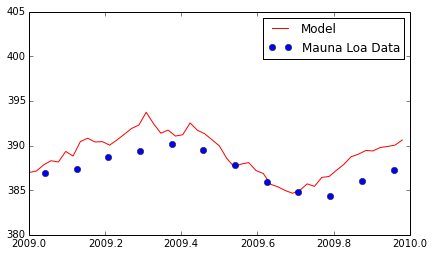

In [11]:
f = open('datafiles/co2_monmean_mlo_pip.txt', 'r')  # We need to re-open the file
mlowk  = []
mloco2 = []
ind = 0
for line in f:
    p = line.split()
    #weekly data
    #mlowk.append(np.float(ind+1))
    #mloco2.append(np.float(p[0]))
    #monthly data
    mlowk.append(np.float(p[0]))
    mloco2.append(np.float(p[1]))
    ind += 1
f.close()

fig = plt.figure(figsize=(15,4))

#Mauna Loa
lonuse = -155.6 # degrees W
latuse = 19.5       # degrees N

dlat = 4.0
idy = int(np.ceil((latuse+90)/dlat))
dlon = 5.0
idx = int(np.ceil((lonuse+180)/dlon))

ts1 = co2[:,0,idy,idx]

bs1 = bsco2[:,0,idy,idx]

#weekly
#ts1ws=np.arange(52)*7
#plt.plot(ts1ws,ts1,'sr')

countwk = np.arange(len(ts1))/52.+2009


plt.subplot(121)

plt.plot(countwk,ts1,'r',label='Model')
plt.plot(mlowk,mloco2,'o',label='Mauna Loa Data')
plt.ylim([380,405])
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
plt.legend(loc='upper right')